# Regresión Lineal

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
#diabetes.target

In [6]:
df_target = pd.DataFrame(data=diabetes.target, columns=['target'])
df_target.head(3)

,target
0,151.0
1,75.0
2,141.0


### Modelo simple (una sola variable)

In [7]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['bmi']]
y = df_target

# Separar los datos en muestras de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
#diabetes.target

In [9]:
# Construir modelo de regresión lineal
modelo_regresion_simple = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion_simple.fit(X_train, y_train)

# Predecir los valores de la variable objetivo (y) para los datos de prueba
y_pred = modelo_regresion_simple.predict(X_test)

In [10]:
# Calcular el error cuadrático medio (MSE) de las predicciones
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Imprimir el MSE
print('Error cuadrático medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))


Error cuadrático medio (MSE): 4150.68
r2: 0.19


In [11]:
print('coeficiente:', modelo_regresion_simple.coef_)
print('intercepto:', modelo_regresion_simple.intercept_)

coeficiente: [[981.65543614]]
intercepto: [152.28824927]


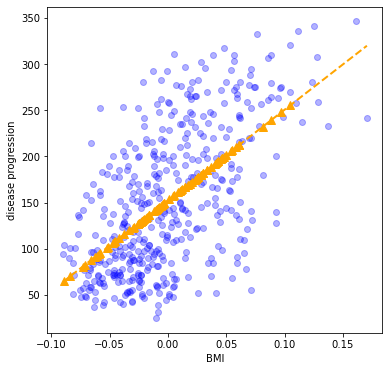

In [12]:
m = modelo_regresion_simple.coef_
b = modelo_regresion_simple.intercept_
z = np.linspace(X.min(), X.max(), 100)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X.values, y.values, 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='--', color='orange', lw=2)
plt.plot(X_test.values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression')
plt.show()

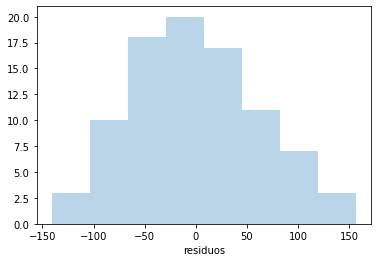

In [13]:
# Distribución de los residuos (valor verdadero - predicción)

plt.hist(y_test.values - y_pred, bins=8, alpha=0.3)
plt.xlabel('residuos');

In [14]:
import statsmodels.api as sm

X = df[['bmi']]
y = df_target

X = sm.add_constant(X) # añadir constante para calcular intercepto

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     211.2
Date:                Thu, 11 May 2023   Prob (F-statistic):           8.70e-38
Time:                        12:54:12   Log-Likelihood:                -1957.0
No. Observations:                 353   AIC:                             3918.
Df Residuals:                     351   BIC:                             3926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.2882      3.303     46.111      0.0

In [15]:
print('Parameters: ', model.params)
print('Standard errors: ', model.bse)

Parameters:  const    152.288249
bmi      981.655436
dtype: float64
Standard errors:  const     3.302676
bmi      67.553156
dtype: float64


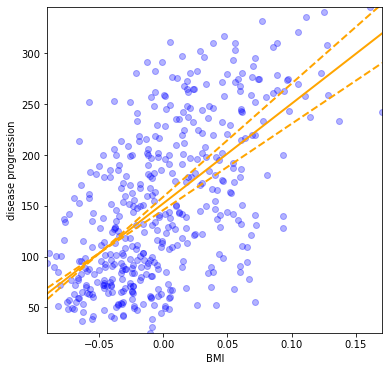

In [16]:
z = np.linspace(X.min(), X.max(), 100)
m = model.params.bmi
b = model.params.const

## Intervalo de confianza
conf_int = model.conf_int()

m_low = conf_int[0]['bmi']
m_up = conf_int[1]['bmi']
b_low = conf_int[0]['const']
b_up = conf_int[1]['const']

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X['bmi'], y['target'], 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='-', color='orange', lw=2)
ax.plot(z, m_low*z + b_low, ls='--', color='orange', lw=2)
ax.plot(z, m_up*z + b_up, ls='--', color='orange', lw=2)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression')
ax.set_xlim(X['bmi'].min(), X['bmi'].max())
ax.set_ylim(y['target'].min(), y['target'].max())
plt.show()

explicación detallada sobre [OLS Regression Results](https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/)

----

### Modelo lineal con dos variables 

In [17]:
X = df[['bmi', 'bp']]
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modelo_2var = LinearRegression()

modelo_2var.fit(X_train, y_train)

y_pred = modelo_2var.predict(X_test)

print('coeficientes:', modelo_2var.coef_)
print('intercepto:', modelo_2var.intercept_)

coeficientes: [[830.48789692 384.39509175]]
intercepto: [152.43720508]


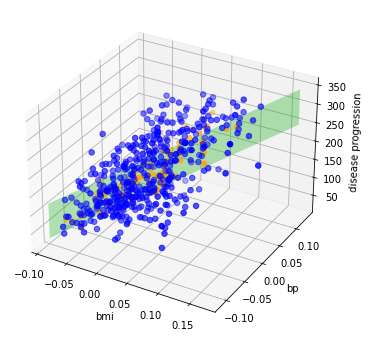

In [18]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

bmi = X['bmi']
bp = X['bp']
target = y

def plano(x1, x2):
    m1 = modelo_2var.coef_[0][0]
    m2 = modelo_2var.coef_[0][1]
    b = modelo_2var.intercept_[0]
    return m1*x1 + m2*x2 + b

X1 = np.linspace(np.min(bmi), np.max(bmi), 20)
X2 = np.linspace(np.min(bp), np.max(bp), 20)

x1grid, x2grid = np.meshgrid(X1, X2)
Z = plano(x1grid, x2grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X1, X2, Z, linewidth=1, color='lime', alpha=0.3)
ax.scatter(bmi, bp, target, marker='o', s=30, color = 'b')
ax.scatter(X_test['bmi'], X_test['bp'], y_pred, '^', color='orange')
ax.set_xlabel('bmi')
ax.set_ylabel('bp')
ax.set_zlabel('disease progression')
#ax.view_init(0, 45)
plt.show()

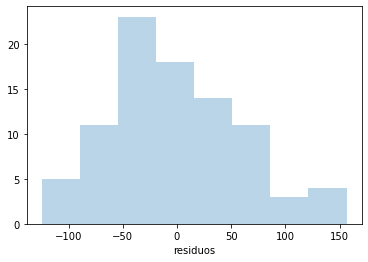

In [19]:
plt.hist(y_test.values - y_pred, bins=8, alpha=0.3)
plt.xlabel('residuos');

----

### Modelo lineal con multiples variables 

In [20]:
X = df
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modelo_regresion_multiple = LinearRegression()

modelo_regresion_multiple.fit(X_train, y_train)

y_pred = modelo_regresion_multiple.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))


Error cuadrático medio (MSE): 3424.32
r2: 0.33


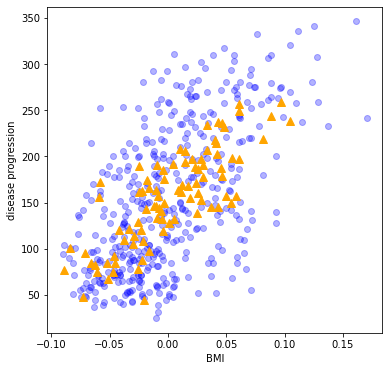

In [22]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(X['bmi'].values, y.values, 'ob', alpha=0.3)
plt.plot(X_test['bmi'].values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression');

In [23]:
X = df
y = df_target

X = sm.add_constant(X) # añadir constante para calcular intercepto

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     42.47
Date:                Thu, 11 May 2023   Prob (F-statistic):           4.05e-54
Time:                        12:54:13   Log-Likelihood:                -1897.7
No. Observations:                 353   AIC:                             3817.
Df Residuals:                     342   BIC:                             3860.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.5381      2.836     53.789      0.0

#### Hipótesis nula: la variable independiente NO tiene influencia en la variable dependiente

In [24]:
import seaborn as sns

X = df
y = df_target
df_completo = X
df_completo['target'] = y['target']

In [25]:
df_completo.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


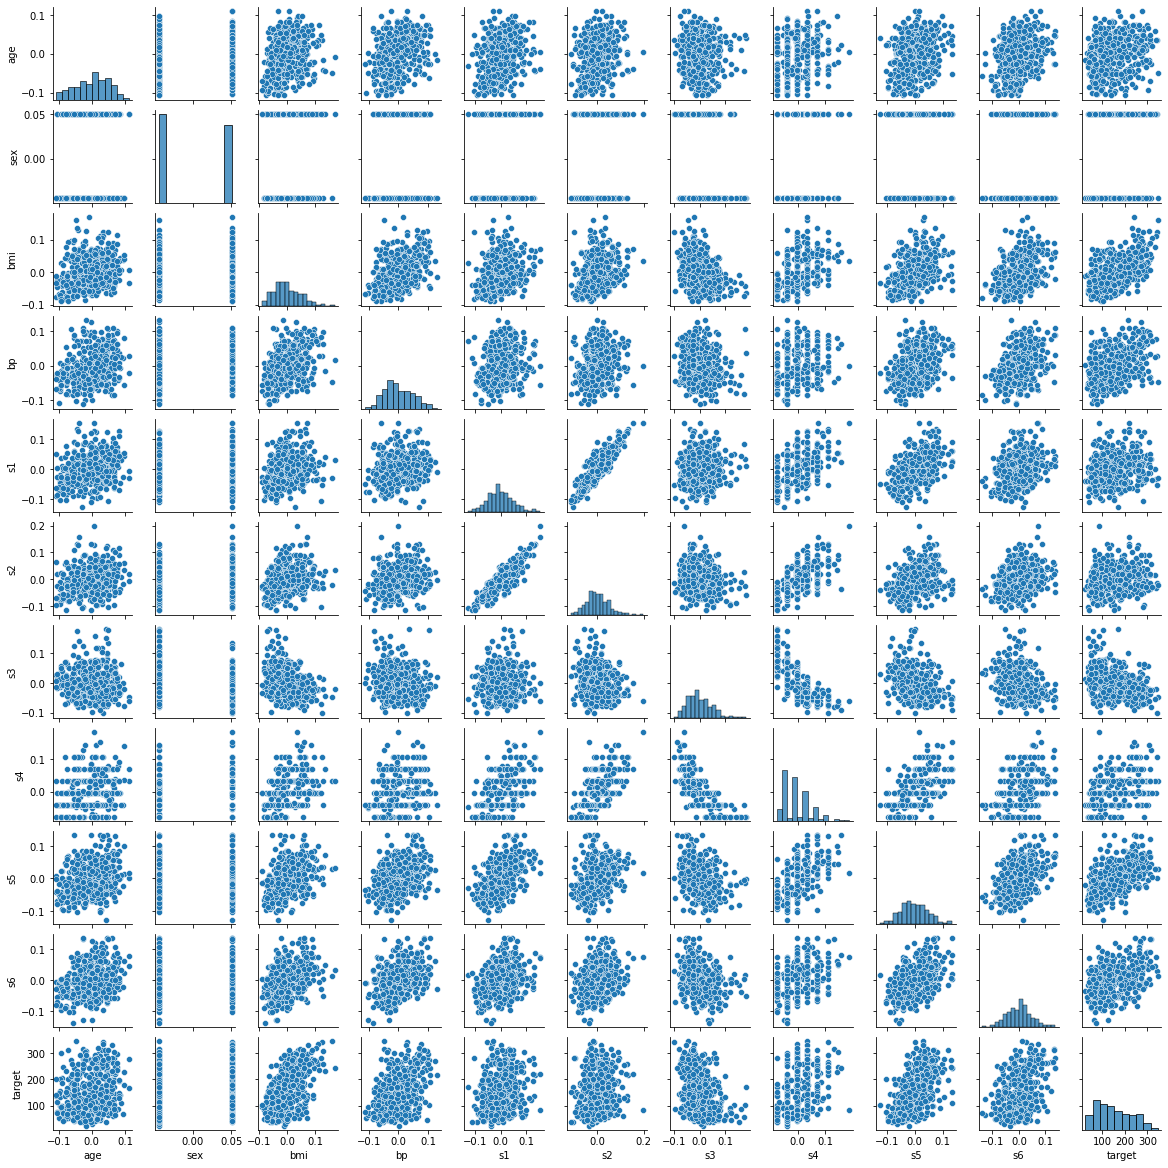

In [26]:
sns.pairplot(df_completo, height=1.5);

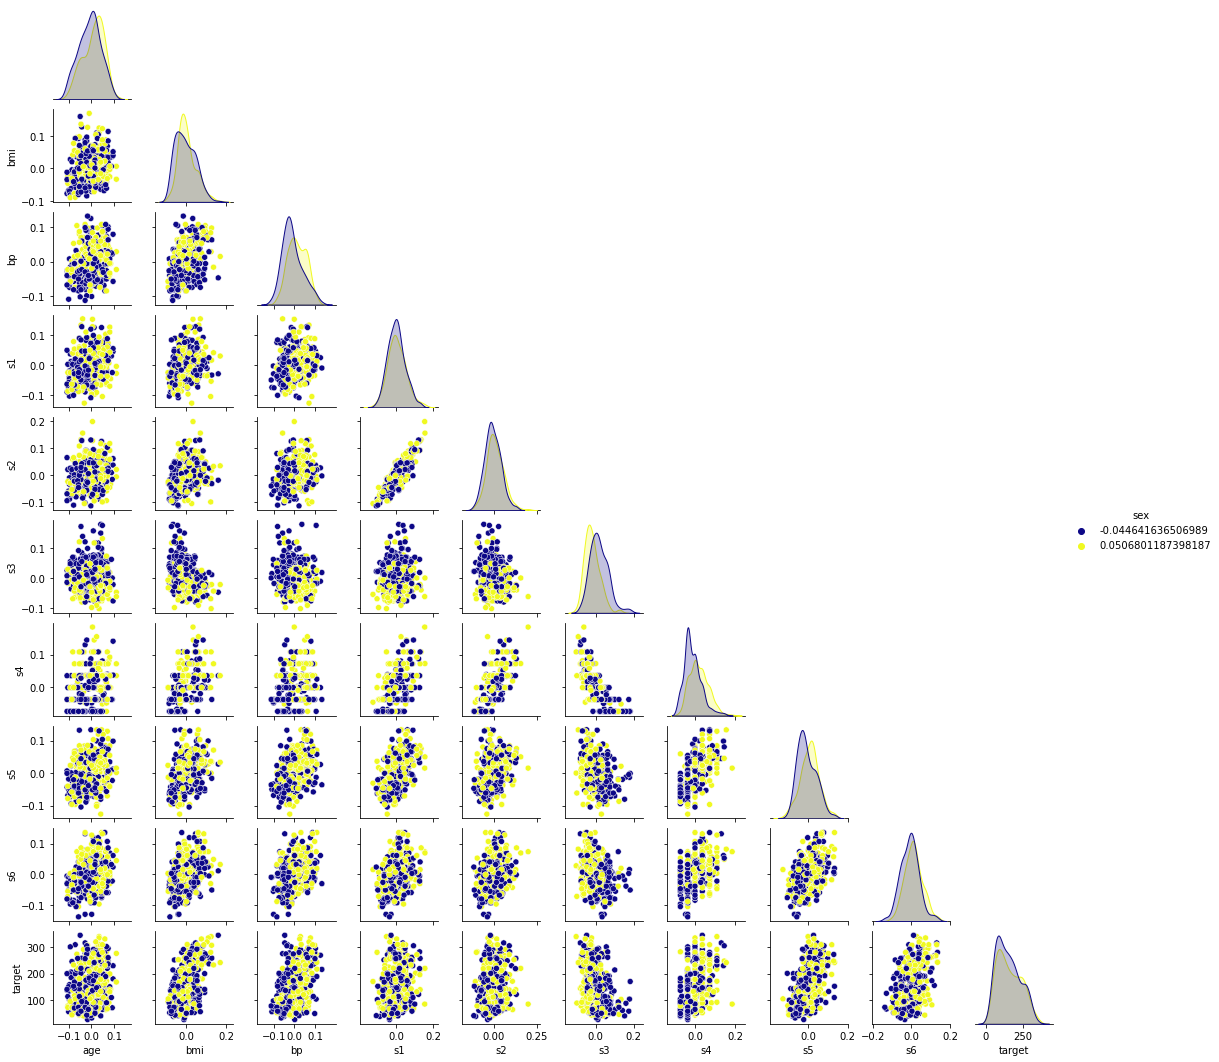

In [27]:
sns.pairplot(df_completo, hue='sex',height=1.5, palette='plasma', corner = True);

## Validación Cruzada

Se aplica para asegurarnos de que el modelo no tenga sesgos por la partición de los datasets. La validación cruzada consiste en repetir el proceso varias veces, con diferentes particiones, para obtener una estimación más precisa del rendimiento del modelo.

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_regresion_multiple, X, y, cv=5)

# imprimir los scores de cada fold
print('Scores de cada fold:', scores)

# imprimir el promedio de los scores
print('Score promedio:', scores.mean())

Scores de cada fold: [1. 1. 1. 1. 1.]
Score promedio: 1.0


## Regresión polinomial

In [29]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['s3']]
y = df_target

poly_grado2 = PolynomialFeatures(degree=2)
X_poly = poly_grado2.fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
reg_poly = LinearRegression()
reg_poly.fit(X_poly, y)

y_pred = reg_poly.predict(X_poly)

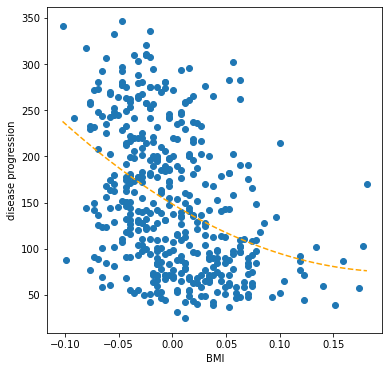

In [30]:
# [1, a, b, a^2, ab, b^2] -> 2 variables
# [1, a, a^2] -> 1 variable

a1 = reg_poly.coef_[0][1]
a2 = reg_poly.coef_[0][2]
b = reg_poly.intercept_[0]
z = np.linspace(X.min(), X.max(), 100)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X, y)
ax.plot(z, a1*z + a2*z**2 +b, color='orange', ls='--')
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression')
plt.show()